In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [67]:
data = pd.read_csv('loan_approval_dataset.csv')

In [68]:
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [69]:
data.isnull().sum()

,0
loan_id,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,0
commercial_assets_value,0


In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [71]:
data.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [72]:
data.drop(columns = ['loan_id'], axis=1, inplace=True)

In [73]:
data.drop(columns = [' education'], axis=1 , inplace=True)

In [74]:
data.head()

,no_of_dependents,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [75]:
from sklearn.preprocessing import LabelEncoder

In [76]:
le = LabelEncoder()
data[' loan_status'] = le.fit_transform(data[' loan_status'])
data[' self_employed'] = le.fit_transform(data[' self_employed'])
data.head()

,no_of_dependents,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,3,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


In [77]:
X = data.drop(columns = [' loan_status'], axis=1)
y = data[' loan_status']

In [78]:
X.shape, y.shape

((4269, 10), (4269,))

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3415, 10), (854, 10), (3415,), (854,))

In [81]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [82]:
#LINEAR REGRESSION
from sklearn.linear_model import LinearRegression

In [83]:
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [84]:
y_pred = LR.predict(X_test)
y_pred

array([ 8.24024252e-01,  3.82381217e-01,  8.13078644e-01,  2.72836166e-01,
        1.24964493e-01,  2.12297313e-01,  1.46182090e-01,  5.75764109e-01,
        4.35602724e-01,  6.31850715e-01,  5.07136021e-01,  1.06965622e-01,
        1.24103971e-01,  8.03008580e-01,  7.87674571e-01,  2.30227921e-01,
        2.00409209e-01,  4.78209475e-01,  8.72044590e-01,  7.45534247e-01,
        4.15099411e-01,  8.93829273e-01,  7.21032937e-01,  7.39587292e-01,
        7.96365214e-03,  1.69685514e-01, -1.32157159e-01,  4.15617714e-01,
       -4.59022010e-02,  7.09766117e-01,  3.06099110e-01,  8.21994282e-01,
        4.60070222e-01,  3.69256737e-01,  1.06136026e+00,  7.82883834e-01,
        3.65431389e-01,  3.51180346e-01, -2.25908877e-01,  9.08853972e-01,
        5.74612349e-01,  3.73384827e-01, -2.16722988e-01, -2.91700156e-01,
        6.36634453e-01,  2.42096380e-01, -1.00179622e-01,  2.27508629e-01,
       -2.03484227e-01,  8.33421003e-01,  8.35157055e-02,  5.74517600e-01,
        5.51029955e-01, -

In [85]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.604522940779719

In [86]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

0.09242670363735123

In [87]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [88]:
rf = RandomForestClassifier(random_state=42)

In [89]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [90]:
y_pred = rf.predict(X_test)
y_pred

array([1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,

In [91]:
accuracy_score(y_test, y_pred)

0.9812646370023419

In [92]:
confusion_matrix(y_test, y_pred)

array([[531,   5],
       [ 11, 307]])

In [93]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       536
           1       0.98      0.97      0.97       318

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



In [94]:
from sklearn.model_selection import GridSearchCV

In [95]:
para = {
    'n_estimators':[15,20,25,30,35,40],
    'criterion':['gini', 'entropy', 'log_loss'],
    'max_depth':[1,2,3,4,5],
    'min_samples_split':[1,2,3],
    'min_samples_leaf':[1,2],
    'max_features':['auto','sqrt','log2'],
    'bootstrap':[True, False],
    'verbose':[-1,0,1]
}

In [31]:
grid_search = GridSearchCV(rf, param_grid = para, cv=5, scoring='accuracy')

In [32]:
grid_search.fit(X_train, y_train)

Streaming output truncated to the last 5000 lines.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  35 out of  

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [15, 20, 25, 30, 35, 40],
                         'verbose': [-1, 0, 1]},
             scoring='accuracy')

In [96]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [97]:
grid_search.best_score_

np.float64(0.9572474377745243)

In [98]:
rf = RandomForestClassifier(criterion='gini',max_depth=2,max_features='sqrt',min_samples_leaf=1,min_samples_split=2,random_state=42)

In [99]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=42)

In [100]:
accuracy_score(y_test, y_pred)

0.9812646370023419

In [101]:
confusion_matrix(y_test, y_pred)

array([[531,   5],
       [ 11, 307]])

In [102]:
#DECISION TREE
from sklearn.tree import DecisionTreeClassifier

In [34]:
dt_model = DecisionTreeClassifier(random_state = 42)

In [35]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [36]:
dt_model.score(X_train, y_train)

1.0

In [37]:
dt_model.score(X_test, y_test)

0.9742388758782201

In [38]:
y_pred = dt_model.predict(X_test)
y_pred

array([1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,

In [39]:
accuracy_score(y_test, y_pred)

0.9742388758782201

In [40]:
from sklearn import tree

[Text(0.6585286458333334, 0.9705882352941176, 'x[5] <= 549.5\ngini = 0.471\nsamples = 3415\nvalue = [2120, 1295]'),
 Text(0.5279947916666666, 0.9117647058823529, 'x[4] <= 5.0\ngini = 0.186\nsamples = 1432\nvalue = [149, 1283]'),
 Text(0.59326171875, 0.9411764705882353, 'True  '),
 Text(0.5071614583333334, 0.8529411764705882, 'x[3] <= 26250000.0\ngini = 0.499\nsamples = 283\nvalue = [149, 134]'),
 Text(0.41015625, 0.7941176470588235, 'x[2] <= 7050000.0\ngini = 0.496\nsamples = 243\nvalue = [110, 133]'),
 Text(0.3203125, 0.7352941176470589, 'x[3] <= 16050000.0\ngini = 0.496\nsamples = 195\nvalue = [106.0, 89.0]'),
 Text(0.22395833333333334, 0.6764705882352942, 'x[2] <= 3850000.0\ngini = 0.494\nsamples = 150\nvalue = [67, 83]'),
 Text(0.15625, 0.6176470588235294, 'x[3] <= 10300000.0\ngini = 0.475\nsamples = 103\nvalue = [63.0, 40.0]'),
 Text(0.10416666666666667, 0.5588235294117647, 'x[2] <= 2750000.0\ngini = 0.499\nsamples = 82\nvalue = [43, 39]'),
 Text(0.08333333333333333, 0.5, 'x[3] <=

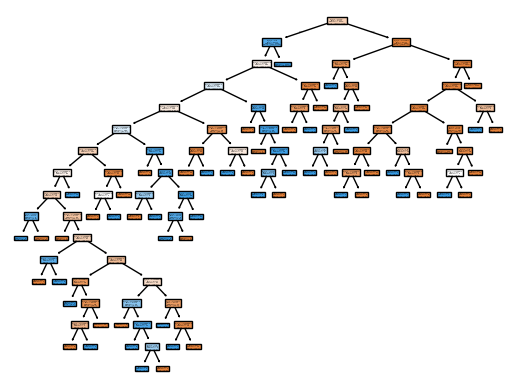

In [41]:
tree.plot_tree(dt_model, filled=True)

In [42]:
params = {
    'criterion':['gini', 'entropy', 'log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5],
    'min_samples_split':[1,2,3],
    'min_samples_leaf':[1,2],
    'max_features':['auto','sqrt','log2']

}

In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
grid_search = GridSearchCV(dt_model, param_grid=params, cv=5, scoring = 'accuracy')

In [45]:
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
1500 fits failed out of a total of 2700.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
900 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/ut

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [1, 2, 3],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [46]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [47]:
grid_search.best_score_

np.float64(0.9572474377745243)

In [48]:
dt_model = DecisionTreeClassifier(random_state = 10, class_weight='balanced', criterion='gini', max_depth=2, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, splitter='best')

In [49]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=2,
                       max_features='sqrt', random_state=10)

[Text(0.5, 0.8333333333333334, 'x[5] <= 549.5\ngini = 0.5\nsamples = 3415\nvalue = [1707.5, 1707.5]'),
 Text(0.25, 0.5, 'x[8] <= 1150000.0\ngini = 0.124\nsamples = 1432\nvalue = [120.008, 1691.678]'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'gini = 0.235\nsamples = 39\nvalue = [6.443, 40.875]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.12\nsamples = 1393\nvalue = [113.565, 1650.803]'),
 Text(0.75, 0.5, 'x[6] <= 50000.0\ngini = 0.02\nsamples = 1983\nvalue = [1587.492, 15.822]'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'gini = 0.307\nsamples = 40\nvalue = [28.19, 6.593]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.012\nsamples = 1943\nvalue = [1559.302, 9.23]')]

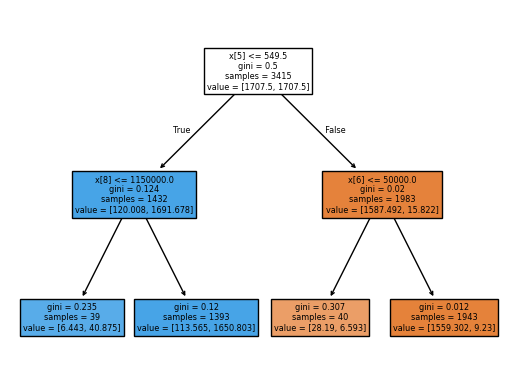

In [50]:
tree.plot_tree(dt_model, filled=True)

In [51]:
y_pred = dt_model.predict(X_test)
y_pred

array([1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,

In [52]:
accuracy_score(y_test, y_pred)

0.9566744730679156

In [53]:
dt_model.score(X_train, y_train)

0.9528550512445095

In [54]:
confusion_matrix(y_test, y_pred)

array([[500,  36],
       [  1, 317]])

In [105]:
import joblib

joblib.dump(rf, 'loan_model.pkl')


['loan_model.pkl']